In [1]:
#필요 라이브러리
import pandas as pd
import numpy as np

#################### Train_Test Split ######################
from sklearn.model_selection import train_test_split


#################### 성능평가 ############################
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import sklearn
#################### XGBoost ###########################
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV


################## lgbm ###########################
from lightgbm import LGBMClassifier

##################### Decision Tree #######################
from sklearn.tree import DecisionTreeClassifier

################## RandomForest ##########################
from sklearn.ensemble import RandomForestClassifier

###################### Logistic Rregression ###############
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [2]:
#모델 성능 평가 함수화
def model_assessment(test,pred):
    confusion = confusion_matrix(test, pred)
    accuracy = accuracy_score(test,pred)
    report = metrics.classification_report(test, pred, digits=2)
    
    print('accuracy', accuracy, '\n')
    print('confusion_matrix',confusion, '\n')
    print(report)

In [3]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
df_m = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/data/PCA30.csv')

In [6]:
df_m.head()

Unnamed: 0              0              1              2             3  \
0           0 -204850.823301   52770.958514  -51743.899640 -74094.165915   
1           1  405653.596448 -815190.314784  -72709.247509 -90350.879491   
2           2 -206097.271257   56087.951338  -46743.977165 -74829.805830   
3           3 -206110.538095   56100.026729  -52058.258259 -75115.582631   
4           4 -198057.263578   36578.193140  549811.023701 -30953.314357   

               4             5             6             7             8  \
0   21946.601873 -23300.910750  23727.231647 -30247.424622 -23103.043492   
1   -9774.509604 -26803.618517 -97785.375494   9020.940422  29321.471578   
2   22286.637358 -25915.054517 -15540.751364 -25132.762481 -20575.290977   
3   22935.645054 -25833.536899 -15445.108749 -24569.240636 -20111.362045   
4  354887.688069 -42251.653571 -20923.867196 -77387.953171 -45056.071869   

              9             10            11            12           13  \
0   7408.619201  -11950.475089 -3.860570e+02   6550.545997 -1809.734301   
1 -28361.755173  108151.816637  1.020552e+06 -27163.089763 -6517.407193   
2   2169.965625   -9793.306133 -7.871127e+02   6383.290913 -2101.591123   
3   6878.747390  -10112.348763 -6.988443e+02   6155.257522 -2069.970026   
4 -90459.010641  -11004.365083  4.307013e+02   4776.089862 -2402.400472   

             14           15           16            17           18  \
0  12354.731227 -1765.532661  -913.911872  -4753.597451  -311.099729   
1 -15006.637588 -4371.368554  6926.029619  -4166.695116  2801.330245   
2  -3581.171104 -1762.940467  -798.431139   2178.362419  -123.843038   
3  -3615.590459 -1741.241630  -705.335974  -4630.200105  -115.199222   
4  -6734.460541  -483.816583   636.169400 -10300.849642  -744.715971   

           19           20         21          22         23         24  \
0  158.886472  -252.534625 -33.835924  112.532205  -8.806348  -0.329644   
1 -423.510043  -880.516795 -72.552842   23.117528 -14.270063   5.922864   
2  194.559392  -210.008613 -90.218719  -14.905291  15.638953 -10.855479   
3  166.597363  -211.383874 -29.039764  -12.282440  -3.675728  10.275420   
4 -356.222427 -1024.813823 -14.739048  -11.505845 -11.296433   8.830334   

          25         26        27         28        29  연체여부  
0 -33.055148  11.179222 -3.672021  14.883649 -9.091747     0  
1   7.501598 -12.392604  1.676508   2.323156  2.320190     0  
2  -2.041852   0.430097  1.146049   0.480500  0.148661     0  
3   0.566608   0.399041 -2.340568   3.386706  1.090823     0  
4  -0.072237   0.896735 -3.269015   4.676838  2.052040     0

In [7]:
df_m.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
len(df_m.columns)

31

Text(0.5, 1, '변수 간 상관관게')

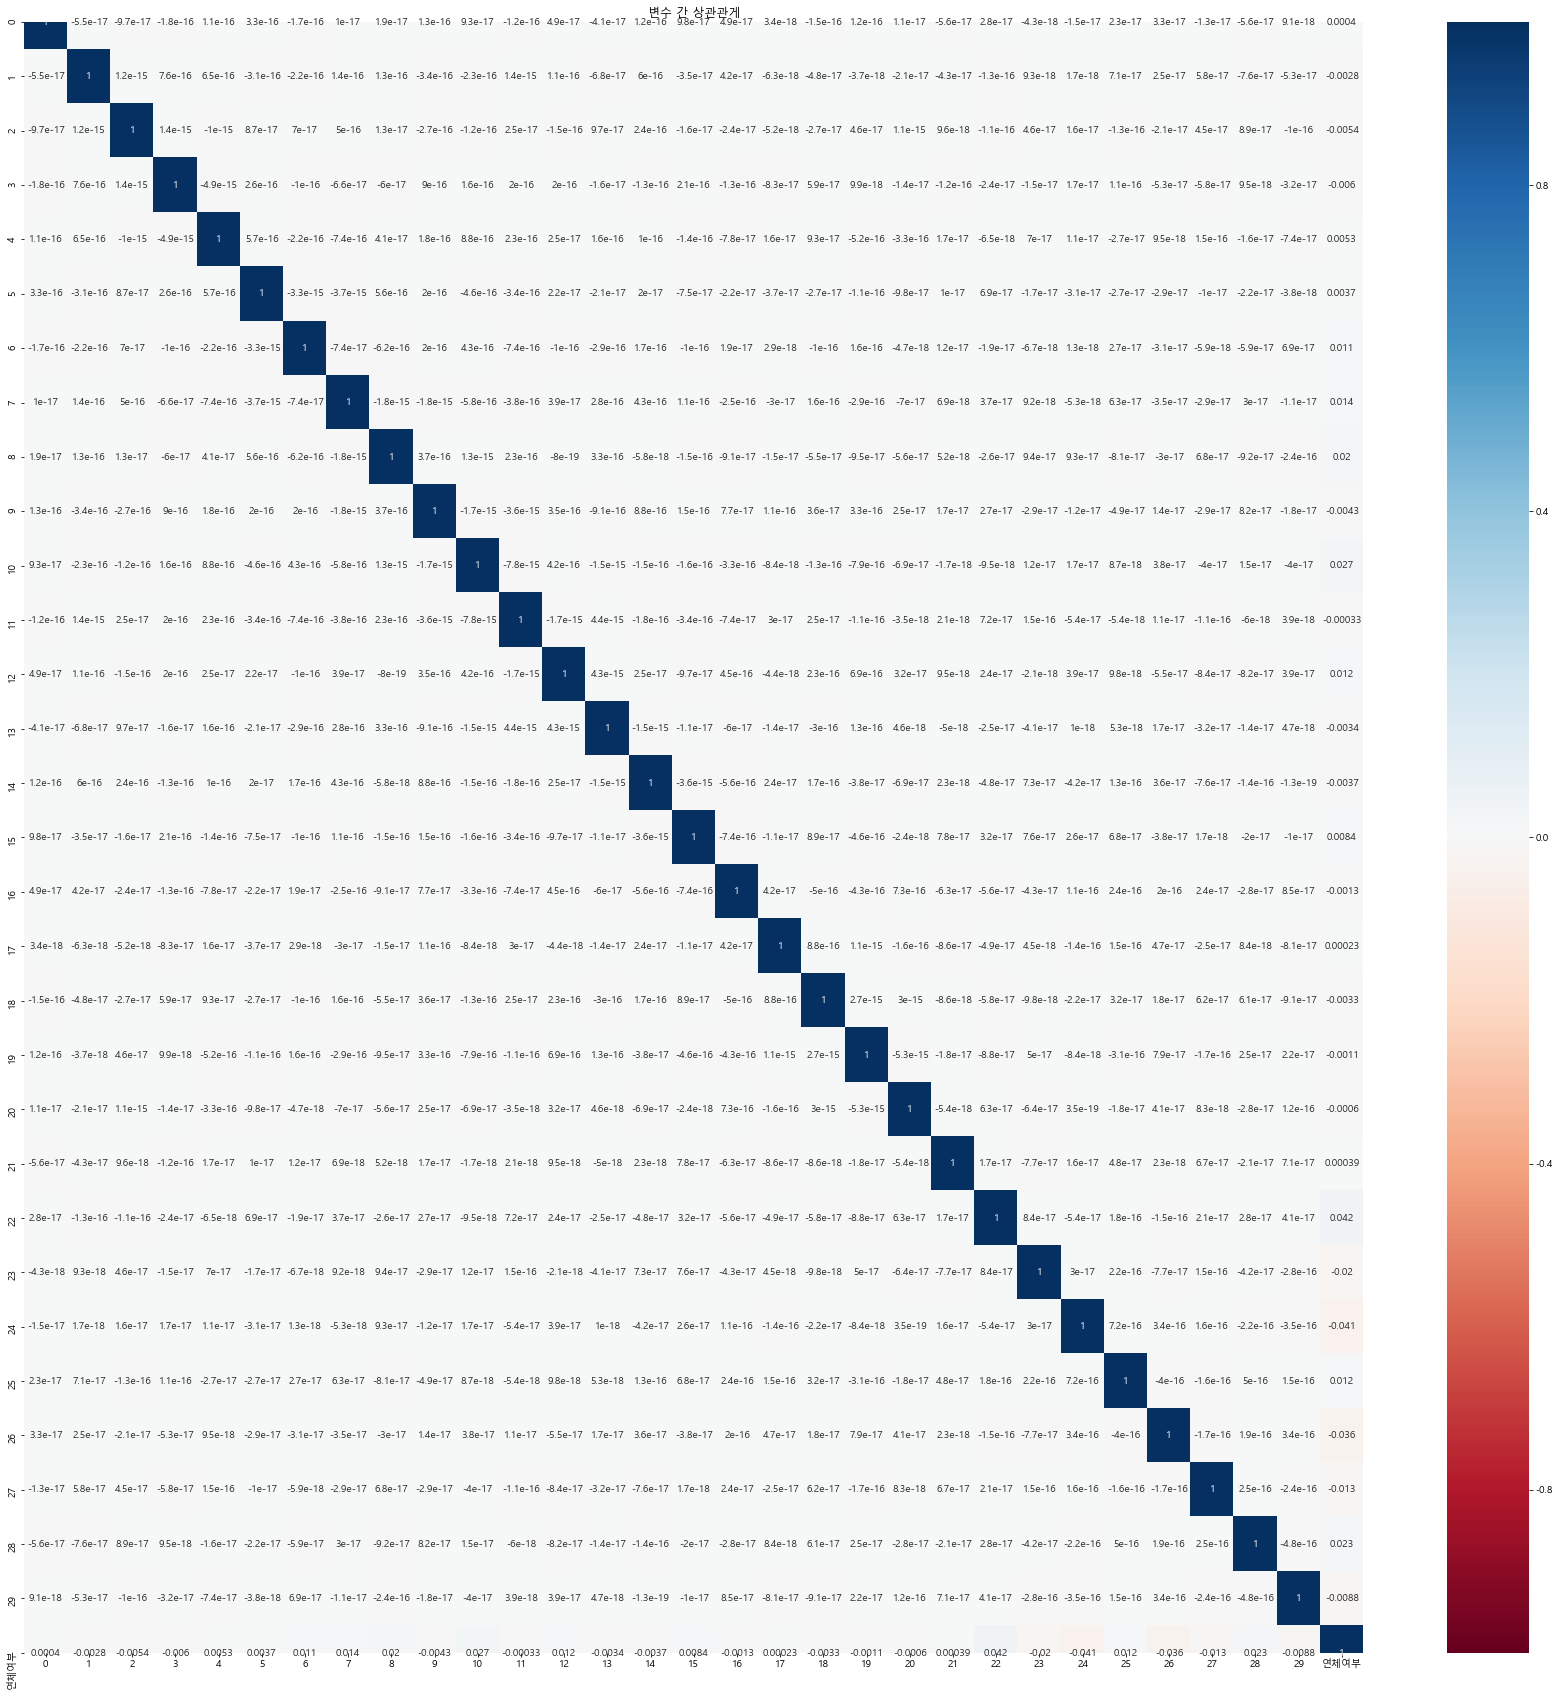

In [9]:
plt.figure(figsize = (30,30))
ax = sns.heatmap(df_m.corr(),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
plt.title('변수 간 상관관게', fontsize = 12)
#plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/png/4.대출잔액_업권.png')

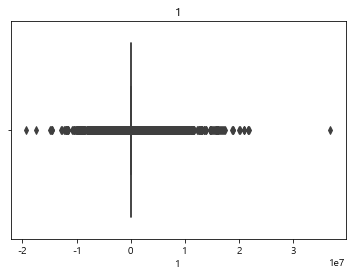

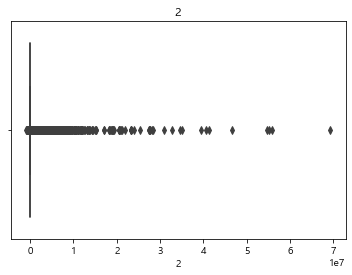

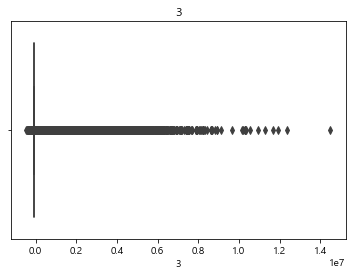

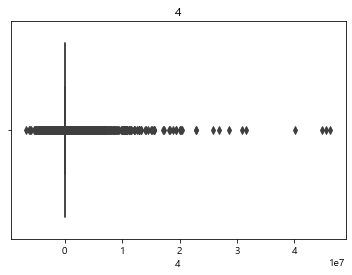

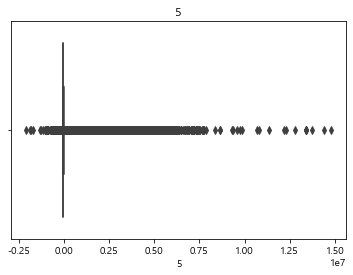

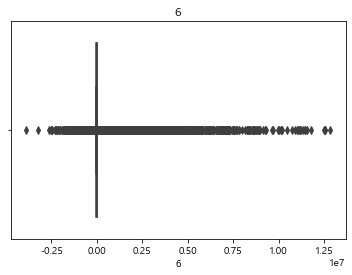

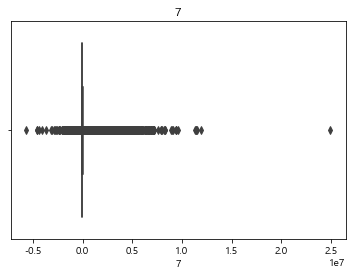

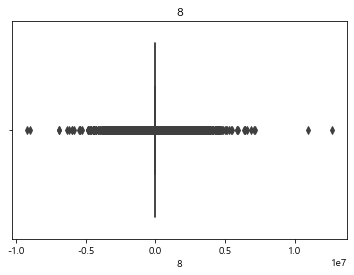

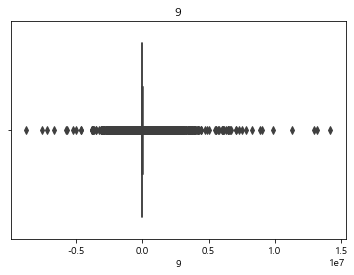

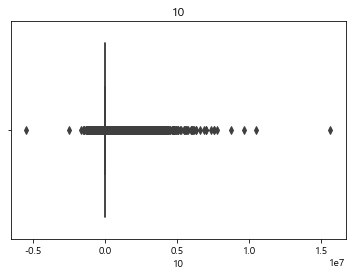

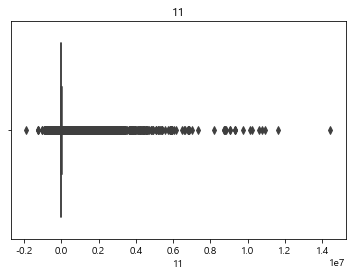

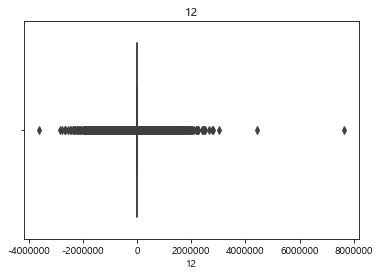

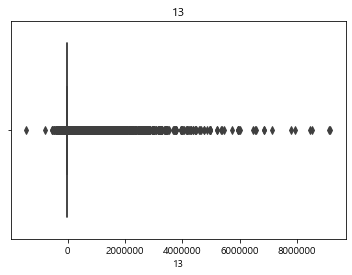

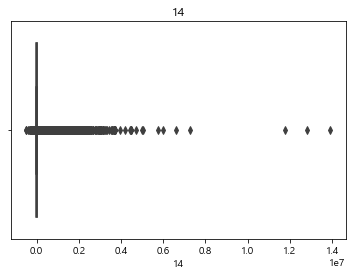

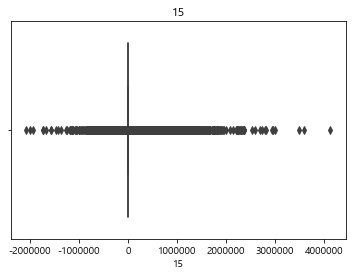

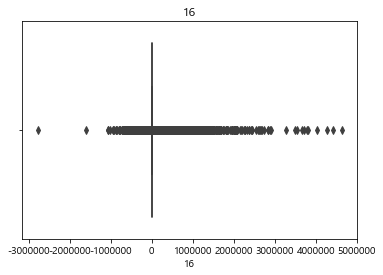

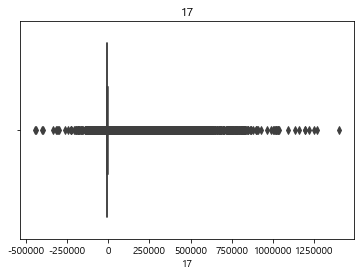

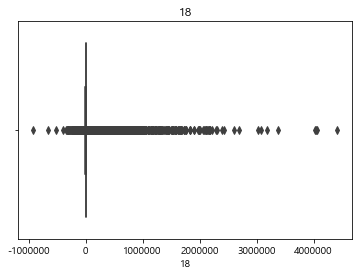

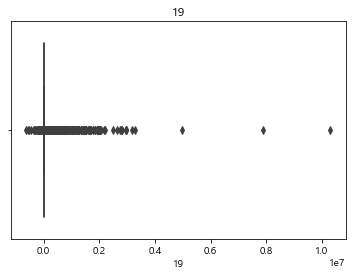

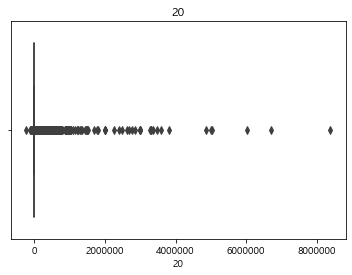

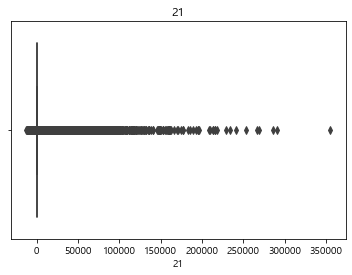

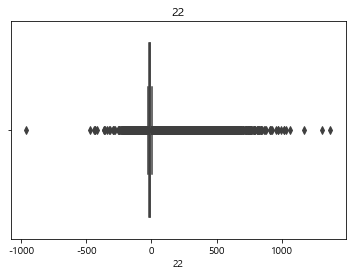

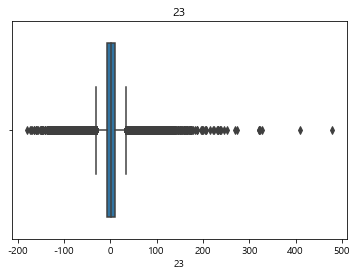

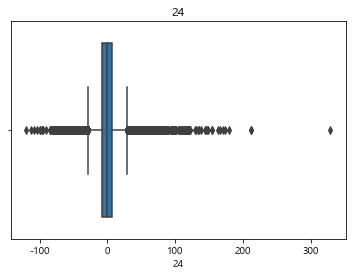

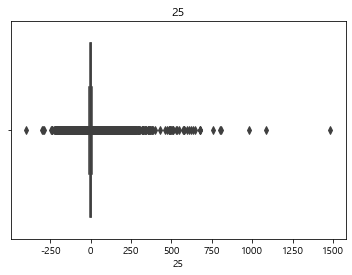

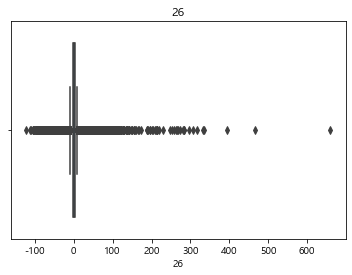

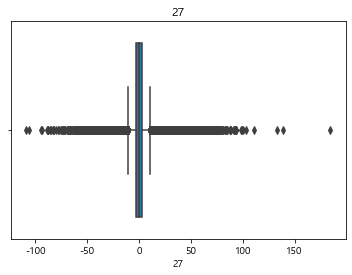

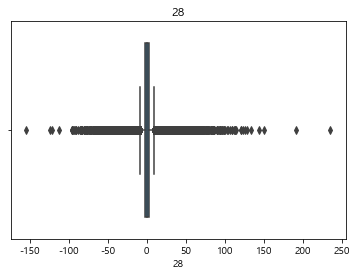

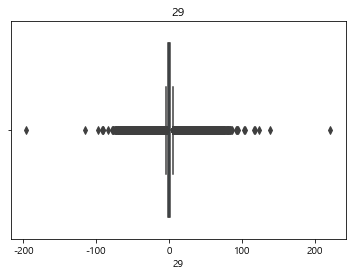

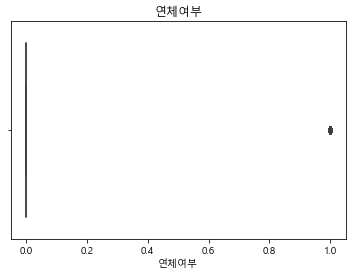

In [10]:
for i in range(1,len(df_m.columns)):
    try:
        sns.boxplot(x=df_m.columns[i], hue='연체여부', data=df_m)
        plt.title(df_m.columns[i])
        plt.show()
    
    except Exception as e:
        print('예외발생')

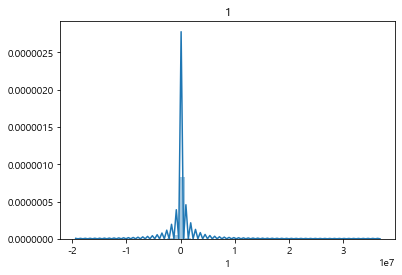

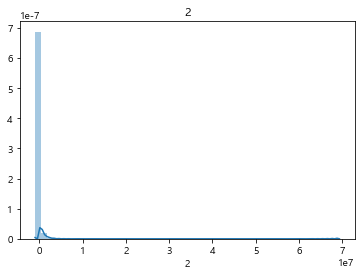

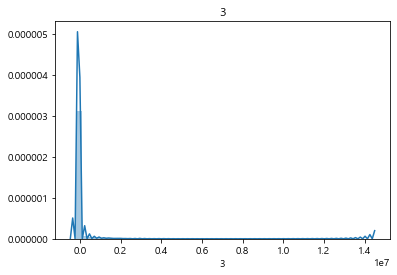

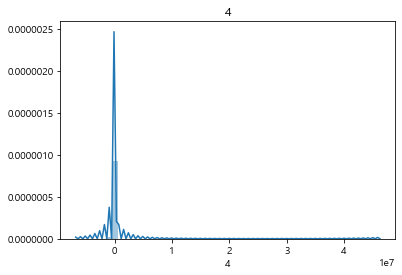

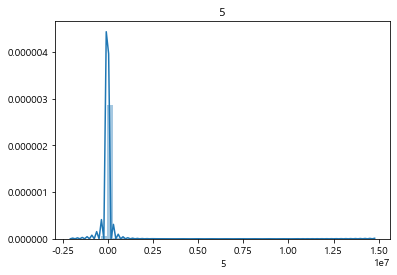

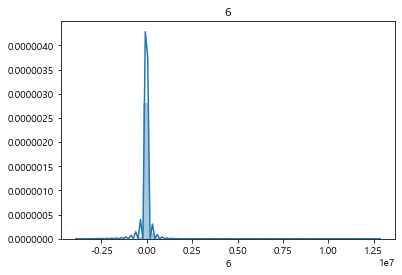

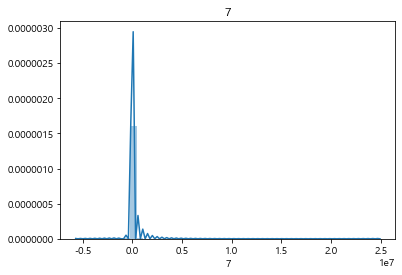

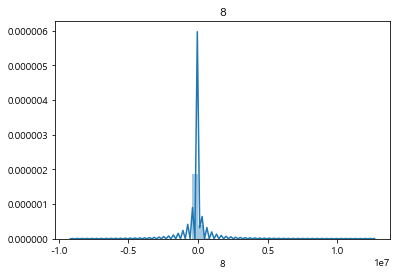

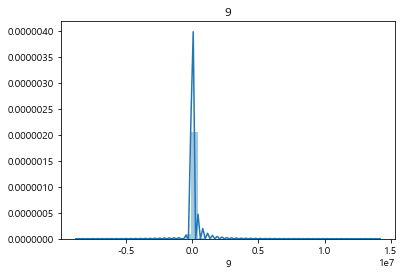

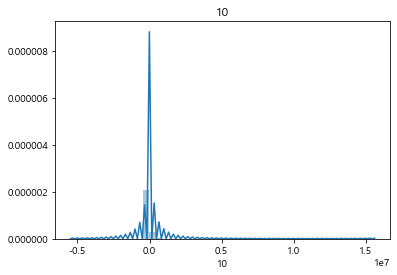

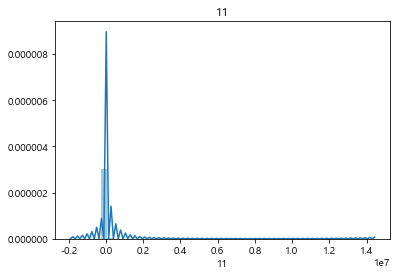

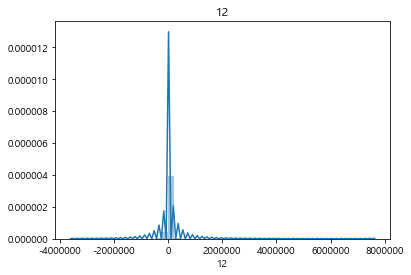

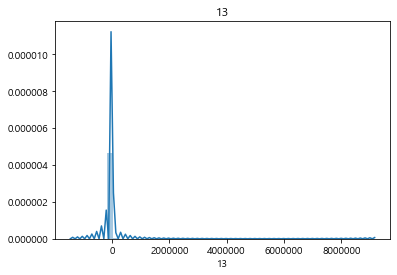

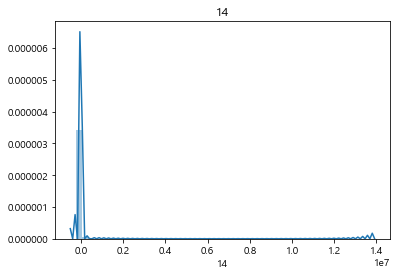

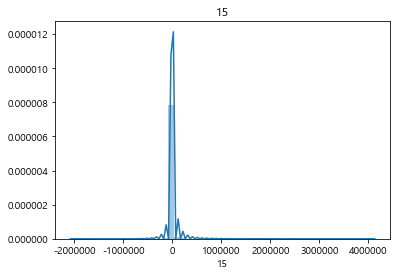

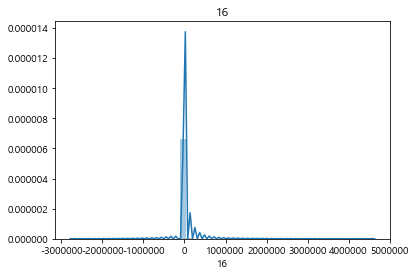

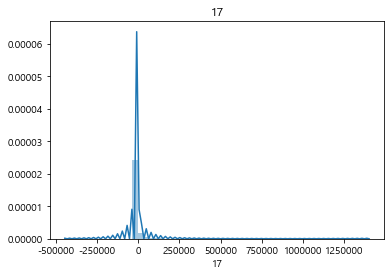

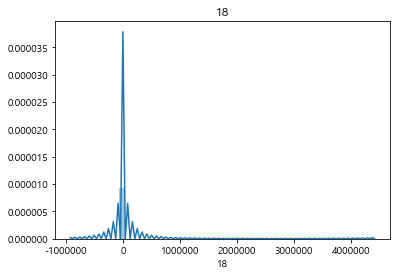

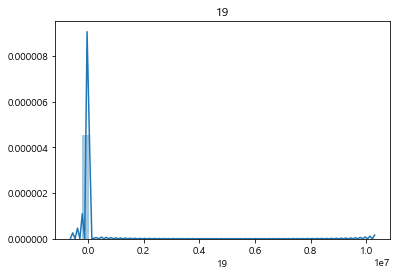

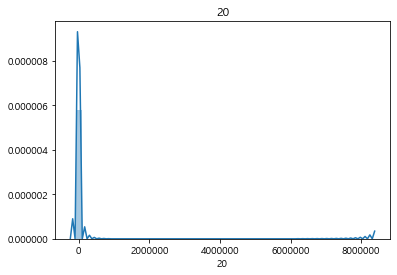

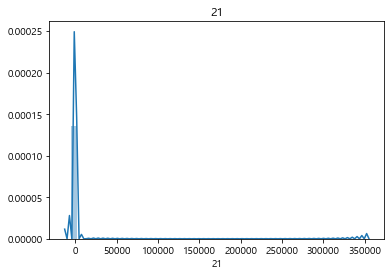

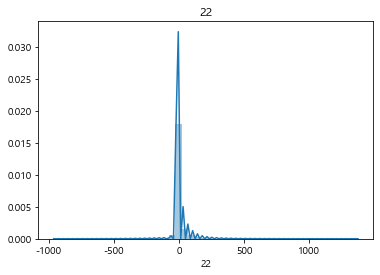

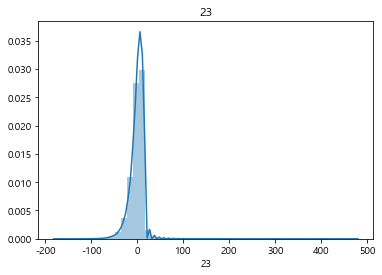

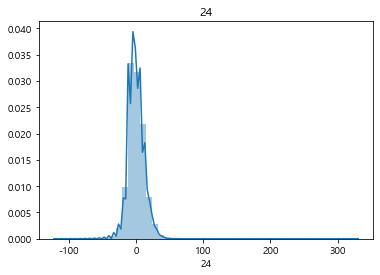

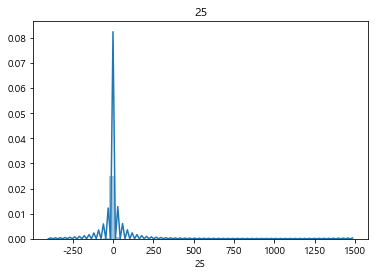

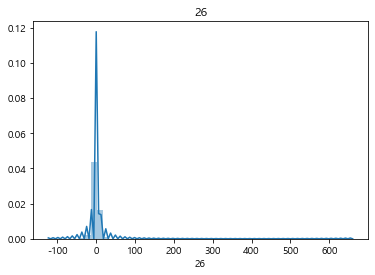

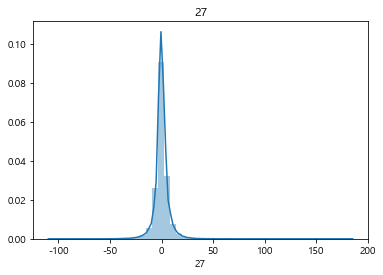

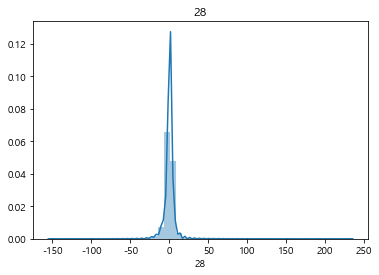

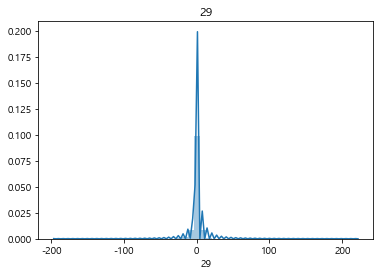

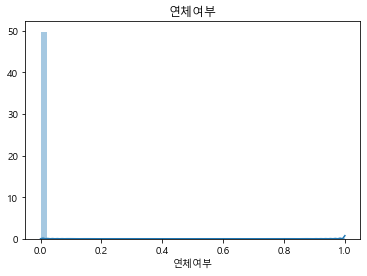

In [15]:
for i in range(1,len(df_m.columns)):
    try:
        sns.distplot(df_m[df_m.columns[i]])
        plt.title(df_m.columns[i])
        plt.show()
    
    except Exception as e:
        print('예외발생')

# 1. Train - Test Split

해당 데이터에서 정상인 케이스 비율이 전체의 약 99.65%, 채무불이행(연체)가 약 0.35%임

In [11]:
df_m['연체여부'].value_counts() / df_m['연체여부'].value_counts().sum() *100

0    99.647121
1     0.352879
Name: 연체여부, dtype: float64

In [58]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

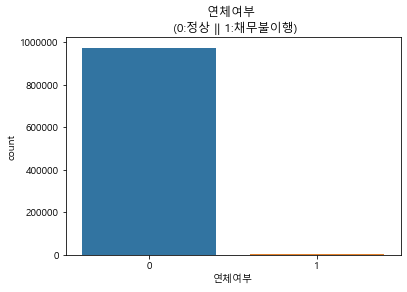

In [59]:
sns.countplot('연체여부', data = df_m)
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

In [12]:
#독립변수
X = df_m.drop(columns=['연체여부'])
y = df_m['연체여부']

* Random State seed 주는 것 보류

In [13]:
#stratify = y는 클래스 비율을 유지 즉 위의 0: 97.53 %  || 1: 2.47% 비율을 Train-Test에도 동일 적용

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=156)
print(X_train.shape, X_test.shape)

(684173, 30) (293217, 30)


In [62]:
y_train.value_counts() / y_train.value_counts().sum() *100

0    99.647165
1     0.352835
Name: 연체여부, dtype: float64

In [63]:
y_test.value_counts() / y_test.value_counts().sum() *100

0    99.647019
1     0.352981
Name: 연체여부, dtype: float64

In [64]:
#.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/X_test.csv')

In [65]:
#y_test.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/y_test.csv')

In [66]:



#X_train.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/X_train.csv')

In [67]:
#y_train.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/y_train.csv')

In [68]:
X_train.shape

(684173, 30)

In [69]:

X_test.shape

(293217, 30)

In [70]:
y_train.shape

(684173,)

In [71]:
y_test.shape

(293217,)

## 3. SMOTE OverSampling

Train Data Set에 대하여 Smote OverSampling 실행

원래 아이디어는 smote -> undersampling 해서 모델링 시간을 줄이려했지만...

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7) # RandomState 변경
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [15]:
print('SMOTE 적용 후 Data Set Size', X_train_over.shape, y_train_over.shape)

SMOTE 적용 후 Data Set Size (1363518, 30) (1363518,)


In [16]:
print('SMOTE 적용 후 Class 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 후 Class 분포:
 1    681759
0    681759
Name: 연체여부, dtype: int64


Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

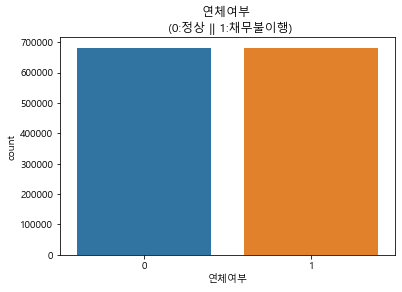

In [75]:
sns.countplot('연체여부', data = y_train_over.to_frame())
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

# Modelling

In [76]:
def auc_return(y_test, pred):
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test,pred)
    auc = metrics.auc(fpr,tpr)
    return auc

# 1. Regression

전통적으로 채무불이행 예측 모델은 다음과 같은 기본 알고리즘을 많이 사용함. 그 이유는 채무불이행 이유에 대한 '설명가능성'이 있기 때문 <br>
보수적인 금융권 특성, 고객과의 신뢰 등을 이유로 알고리즘의 설명 가능성에 대해 매우 민감함 <br>

## 1-1) Logistic

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'penalty' : ['l1','l2']}

lr_grid = GridSearchCV(lr, param_grid = params)

In [32]:
lr_grid.fit(X_train_over,y_train_over)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [34]:
lr_pred = lr_grid.predict(X_test)

In [35]:
model_assessment(y_test, lr_pred)

accuracy 0.2821732709904269 

confusion_matrix [[ 81821 210361]
 [   118    917]] 

              precision    recall  f1-score   support

           0       1.00      0.28      0.44    292182
           1       0.00      0.89      0.01      1035

    accuracy                           0.28    293217
   macro avg       0.50      0.58      0.22    293217
weighted avg       1.00      0.28      0.44    293217



In [36]:
auc = auc_return(y_test,lr_pred) # 변경
print(auc)

0.5830123501541971


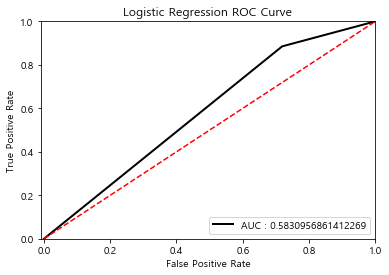

In [44]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, lr_pred)
plt.title('Logistic Regression ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/Logistic Regression ROC.png')
plt.show()

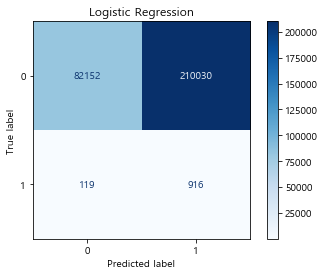

In [45]:
plot_confusion_matrix(lr,X_test,y_test,cmap='Blues')

plt.title('Logistic Regression')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/Logistic Regression Confusion Matrix.png')
plt.show()

In [46]:
#모델저장
import pickle as pkl
with open("lr_model.pkl",'wb') as outfile:
    pkl.dump(lr,outfile)

In [47]:
#모델저장
import pickle as pkl
with open("lr_predict.pkl",'wb') as outfile:
    pkl.dump(lr_pred,outfile)

# 2. Classification

### 2-1) XGBOOST

In [48]:
#X_test.head()

In [17]:
######기본모델
xgb_over_model = XGBClassifier(n_estimators=1000,
                              objective='binary:logistic',
                              seed=156,
                              learning_rate=0.01)
xgb_over_model.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[0]	validation_0-logloss:0.68971	validation_1-logloss:0.68888
[1]	validation_0-logloss:0.68449	validation_1-logloss:0.68513
[2]	validation_0-logloss:0.68148	validation_1-logloss:0.68128
[3]	validation_0-logloss:0.67679	validation_1-logloss:0.67747
[4]	validation_0-logloss:0.67405	validation_1-logloss:0.67384
[5]	validation_0-logloss:0.67020	validation_1-logloss:0.67017
[6]	validation_0-logloss:0.66615	validation_1-logloss:0.66668
[7]	validation_0-logloss:0.66294	validation_1-logloss:0.66311
[8]	validation_0-logloss:0.65957	validation_1-logloss:0.65976
[9]	validation_0-logloss:0.65578	validation_1-logloss:0.65633
[10]	validation_0-logloss:0.65299	validation_1-logloss:0.65314
[11]	validation_0-logloss:0.64937	validation_1-logloss:0.64967
[12]	validation_0-logloss:0.64659	validation_1-logloss:0.64642
[13]	validation_0-logloss:0.64268	validation_1-logloss:0.64353
[14]	validation_0-logloss:0.63993	validation_1-logloss:0.64058
[15]	validation_0-logloss:0.63686	validation_1-logloss:0.63735
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              random_state=156, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=156, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [20]:
xgb_over_pred = xgb_over_model.predict(X_test)

In [21]:
print('<OverSampling 후 XGBoost 기본 모델 성능>')
model_assessment(y_test, xgb_over_pred)

<OverSampling 후 XGBoost 기본 모델 성능>
accuracy 0.8099393964197165 

confusion_matrix [[236784  55398]
 [   331    704]] 

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    292182
           1       0.01      0.68      0.02      1035

    accuracy                           0.81    293217
   macro avg       0.51      0.75      0.46    293217
weighted avg       1.00      0.81      0.89    293217



In [23]:
xgb_over_model = XGBClassifier(n_estimators=100, objective = 'binary:logistic')

params = {'max_depth': [5,7,9,11],
          'n_estimators':[100,200,300,400,500],
         'mix_child_weight': [1,3,5,7],
         'colsample_bytree': [0.5, 0.75, 1.0]}

grid_xgb  = GridSearchCV(xgb_over_model, param_grid = params)

In [ ]:
grid_xgb.fit(X_train_over, y_train_over, early_stopping_rounds = 10, eval_metric = 'error',
                 eval_set = [(X_train_over,y_train_over),(X_test,y_test)])

[16:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mix_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.23236	validation_1-error:0.31931
[1]	validation_0-error:0.20911	validation_1-error:0.26805
[2]	validation_0-error:0.20393	validation_1-error:0.24665
[3]	validation_0-error:0.20236	validation_1-error:0.24080
[4]	validation_0-error:0.19688	validation_1-error:0.23820
[5]	validation_0-error:0.19460	validation_1-error:0.23586
[6]	validation_0-error:0.19158	validation_1-error:0.23336
[7]	validation_0-error:0.18699	validation_1-error:0.23353
[8]	validation_0-error:0.18473	validation_1-error:0.22983
[9]	validation_0-error:0.18292	validation_1-error:0.22861
[10]	validation_0-error:0.

In [ ]:
xgb_over_pred = grid_xgb.predict(X_test)

In [ ]:
print('<OverSampling 후 XGBoost 기본 모델 성능>')
model_assessment(y_test, xgb_over_pred)

In [52]:
auc = auc_return(y_test,xgb_over_pred) # 변경
print(auc)

0.5464535654221476


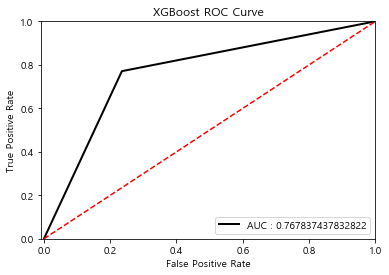

In [34]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, xgb_over_pred)
plt.title('XGBoost ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/XGBoost ROC.png')
plt.show()

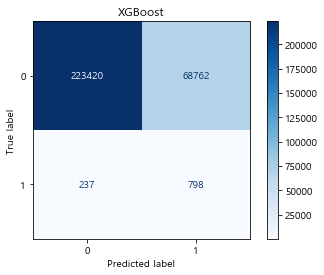

In [36]:
plot_confusion_matrix(xgb_over_model,X_test,y_test,cmap='Blues')

plt.title('XGBoost')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/XGBoost.png')
plt.show()

In [37]:
#모델저장
import pickle as pkl
with open("xgb_model.pkl",'wb') as outfile:
    pkl.dump(xgb_over_model,outfile)

In [38]:
#모델저장
import pickle as pkl
with open("xgb_predict.pkl",'wb') as outfile:
    pkl.dump(xgb_over_pred,outfile)

In [39]:
xgb_over_model.feature_importances_

array([0.01412689, 0.01479052, 0.00749605, 0.0072275 , 0.02976778,
       0.00811967, 0.02315673, 0.00551835, 0.06329501, 0.00650746,
       0.14124483, 0.00568911, 0.04268198, 0.09312242, 0.01531543,
       0.00705788, 0.01644059, 0.00925176, 0.02421782, 0.02513488,
       0.02494256, 0.00678565, 0.23223244, 0.02543684, 0.05425616,
       0.01488606, 0.04255945, 0.0161901 , 0.01559749, 0.00695054],
      dtype=float32)

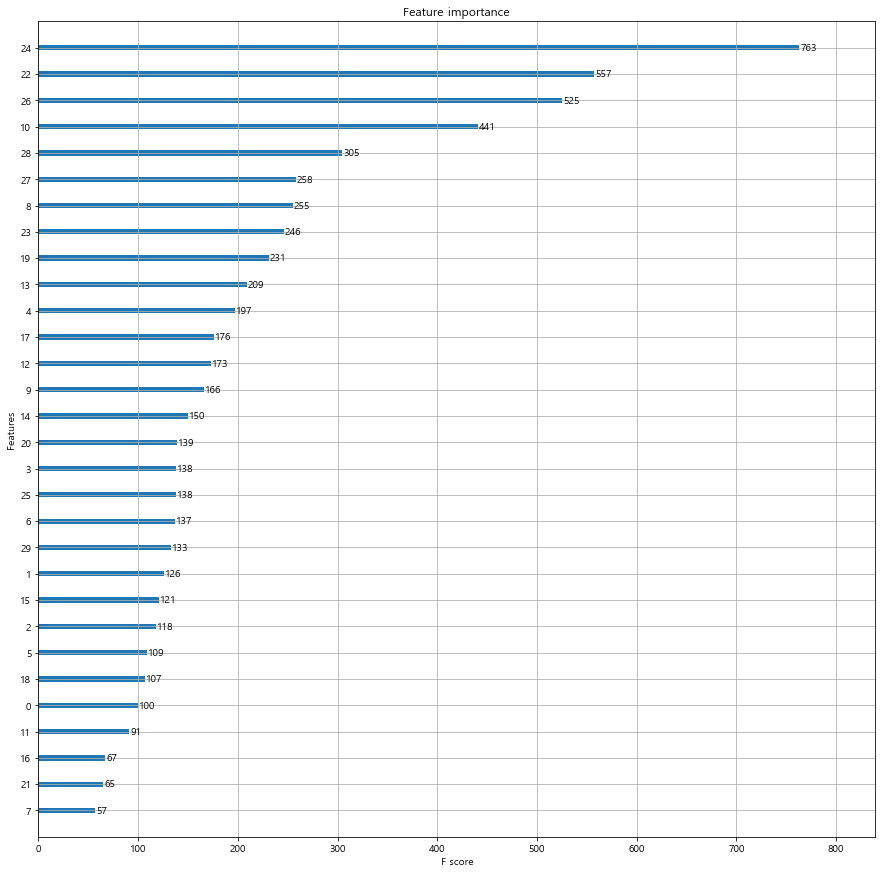

In [42]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgb_over_model.get_booster(), ax=ax)
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/XGBoost_FeatureImportance.png')

## 2) LightGBM

In [81]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100,objective='binary')

params = {
    'max_depth':[-1],
    'num_iteration':[100,500,1000],
    'learning_rate':[0.01, 0.05, 0.1],
    'n_estimators' : [300,400,500],
    'random_sate' :[77]
}

lgbm_grid = GridSearchCV(lgbm, param_grid=params, n_jobs=-1, verbose=10)

In [82]:
lgbm_grid.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Unknown parameter: random_sate
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[1]	training's binary_logloss: 0.655792	valid_1's binary_logloss: 0.656257
Training until validation scores don't improve for 100 rounds
[2]	training's binary_logloss: 0.625005	valid_1's binary_logloss: 0.626398
[3]	training's binary_logloss: 0.598965	valid_1's binary_logloss: 0.60167
[4]	training's binary_logloss: 0.577073	valid_1's binary_logloss: 0.581203
[5]	training's binary_logloss: 0.558205	valid_1's binary_logloss: 0.563957
[6]	training's binary_logloss: 0.541468	valid_1's binary_logloss: 0.548811
[7]	training's binary_logloss: 0.527211	valid_1's binary_logloss: 0.536002
[8]	training's binary_logloss: 0.514562	valid_1's binary_logloss: 0.524881
[9]	training's binary_logloss: 0.503565	valid_1's binary_logloss: 0.515278
[10]	training's binary_logloss

GridSearchCV(estimator=LGBMClassifier(objective='binary'), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [-1],
                         'n_estimators': [300, 400, 500],
                         'num_iteration': [100, 500, 1000],
                         'random_sate': [77]},
             verbose=10)

In [83]:
lgbm_pred = lgbm_grid.predict(X_test)

In [84]:
print('<OverSampling 후 LightGBM 기본 모델 성능>')
model_assessment(y_test, lgbm_pred)

<OverSampling 후 LightGBM 기본 모델 성능>
accuracy 0.9111988731894808 

confusion_matrix [[266849  25333]
 [   705    330]] 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    292182
           1       0.01      0.32      0.02      1035

    accuracy                           0.91    293217
   macro avg       0.51      0.62      0.49    293217
weighted avg       0.99      0.91      0.95    293217



In [85]:
auc = auc_return(y_test,lgbm_pred) # 변경
print(auc)

0.6160688855933452


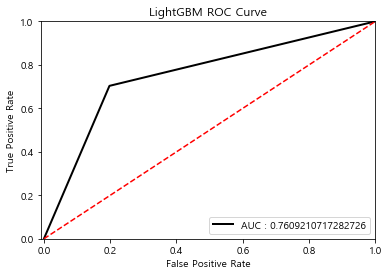

In [85]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, 
                                                lgbm_pred) ##############
plt.title('LightGBM ROC Curve') ################
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/LGBM ROC.png') ##############
plt.show()

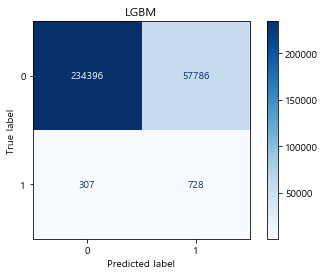

In [86]:
plot_confusion_matrix(lgbm #######
                      ,X_test,y_test,cmap='Blues')

plt.title('LGBM') ##############
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/LGBM.png') ##############
plt.show()

In [54]:
#모델저장
import pickle as pkl
with open("lgbm_model.pkl",'wb') as outfile:
    pkl.dump(lgbm,outfile)

In [55]:
#모델저장
import pickle as pkl
with open("lgbm_model.predict",'wb') as outfile:
    pkl.dump(lgbm_pred,outfile)

## 3) RandomForest

In [57]:
rfc = RandomForestClassifier(n_estimators=100, random_state=146)
rfc.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=146)

In [58]:
rfc_prd = rfc.predict(X_test)

In [59]:
print('<OverSampling 후 RandomForest 기본 모델 성능>')

model_assessment(y_test,rfc_prd)

<OverSampling 후 RandomForest 기본 모델 성능>
accuracy 0.9851406978449407 

confusion_matrix [[288818   3364]
 [   993     42]] 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    292182
           1       0.01      0.04      0.02      1035

    accuracy                           0.99    293217
   macro avg       0.50      0.51      0.51    293217
weighted avg       0.99      0.99      0.99    293217



## 4) Decision Tree

In [60]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_over, y_train_over)

In [61]:
dt_pred = dt.predict(X_test)

In [62]:
print('<OverSampling 후 Decision Tree 기본 모델 성능>')

model_assessment(y_test,dt_pred)

<OverSampling 후 Decision Tree 기본 모델 성능>
accuracy 0.9664582885712629 

confusion_matrix [[283270   8912]
 [   923    112]] 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    292182
           1       0.01      0.11      0.02      1035

    accuracy                           0.97    293217
   macro avg       0.50      0.54      0.50    293217
weighted avg       0.99      0.97      0.98    293217



## 5) Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21,max_depth = 5)
gbc.fit(X_train_over, y_train_over)
gbc_pred = gbc.predict(X_test)

In [64]:
gbc_pred = gbc.predict(X_test)

In [65]:
print('Gradient Boosting 기본 모델 성능')

model_assessment(y_test,gbc_pred)

Gradient Boosting 기본 모델 성능
accuracy 0.8007857661731755 

confusion_matrix [[234058  58124]
 [   289    746]] 

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    292182
           1       0.01      0.72      0.02      1035

    accuracy                           0.80    293217
   macro avg       0.51      0.76      0.46    293217
weighted avg       1.00      0.80      0.89    293217



In [67]:
#모델저장
import pickle as pkl
with open("gbc_model.pkl",'wb') as outfile:
    pkl.dump(gbc,outfile)

In [70]:
#모델저장
import pickle as pkl
with open("gbc_predict.pkl",'wb') as outfile:
    pkl.dump(gbc_pred,outfile)

In [79]:
auc = auc_return(y_test,gbc_pred) # 변경
print(auc)

0.7609210717282726


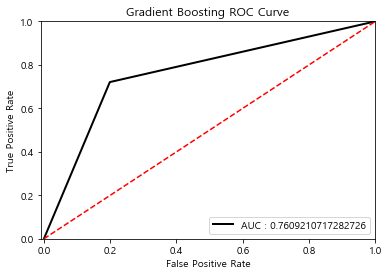

In [83]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, gbc_pred)
plt.title('Gradient Boosting ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/GBC ROC.png')
plt.show()

In [ ]:
from math

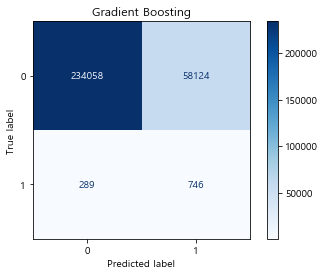

In [84]:
plot_confusion_matrix(gbc,X_test,y_test,cmap='Blues')

plt.title('Gradient Boosting')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/GBC.png')
plt.show()

## 5) CatBoost